In [95]:
import pandas as pd
import matplotlib.pyplot as plt

prezzo_data = pd.read_csv('prezzo_df.csv', encoding='utf-8')

In [96]:
def drop_nulls(df):
    print(df.shape)
    df.dropna(inplace=True)
    print(df.shape)

drop_nulls(prezzo_data)

(220, 6)
(181, 6)


In [192]:
import emoji

def check_for_emojis(text):
    emojis = [c for c in text if c in emoji.UNICODE_EMOJI]

    # Print the emojis found in the text
    if emojis:
        print("Emojis found in the text:")
        for emoji_character in emojis:
            print(emoji_character)
    else:
        print("No emojis found in the text.")

prezzo_data['Review Description'].apply(check_for_emojis)

AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

In [97]:
import emoji
import re
def remove_emojis(text):
    emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002500-\U00002BEF"  # chinese char
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642"
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def apply_remove_emojis(df):
    df['Review Description'] = df['Review Description'].apply(remove_emojis)
    df['word_count'] = df['Review Description'].apply(lambda x: len(x.split()))

apply_remove_emojis(prezzo_data)
prezzo_data.head()

,Unnamed: 0,Company Name,Title of Review,Review Description,Date of Review,No. of stars,word_count
0,0,Prezzo,Prezzo Lakeside …,Prezzo Lakeside 3 of us had chicken Alfredo th...,"Oct 24, 2023",Rated 1 out of 5 stars,26
1,1,Prezzo,Shameful Customer Service - Prezzo @ The Light...,Well we thought what would be nicer than a fin...,"Oct 17, 2023",Rated 1 out of 5 stars,130
2,2,Prezzo,Had a meal at Prezzo in Bath,Had a meal at Prezzo in Bath. There was six of...,"Oct 20, 2023",Rated 3 out of 5 stars,82
3,3,Prezzo,Manager of Broughton restaurant was so…,Manager of Broughton restaurant was so rude wh...,"Oct 5, 2023",Rated 1 out of 5 stars,61
4,4,Prezzo,Poor food quality,We paid £60 For a meal that was very poor an...,"Updated Sep 23, 2023",Rated 1 out of 5 stars,84


In [98]:
def rate_mapping(text):
    dict = {'Rated 1 out of 5 stars':'1 star',
            'Rated 2 out of 5 stars':'2 stars',
            'Rated 3 out of 5 stars':'3 stars',
            'Rated 4 out of 5 stars':'4 stars',
            'Rated 5 out of 5 stars':'5 stars',}
    return dict[text]
def change_rating_format(df):
    df['No. of stars'] = df['No. of stars'].apply(rate_mapping)

change_rating_format(prezzo_data)
prezzo_data.head()

,Unnamed: 0,Company Name,Title of Review,Review Description,Date of Review,No. of stars,word_count
0,0,Prezzo,Prezzo Lakeside …,Prezzo Lakeside 3 of us had chicken Alfredo th...,"Oct 24, 2023",1 star,26
1,1,Prezzo,Shameful Customer Service - Prezzo @ The Light...,Well we thought what would be nicer than a fin...,"Oct 17, 2023",1 star,130
2,2,Prezzo,Had a meal at Prezzo in Bath,Had a meal at Prezzo in Bath. There was six of...,"Oct 20, 2023",3 stars,82
3,3,Prezzo,Manager of Broughton restaurant was so…,Manager of Broughton restaurant was so rude wh...,"Oct 5, 2023",1 star,61
4,4,Prezzo,Poor food quality,We paid £60 For a meal that was very poor an...,"Updated Sep 23, 2023",1 star,84


In [176]:
def create_nlp_data(df):
    selected_columns = ['Review Description','No. of stars', 'Date of Review']
    new_df = df[selected_columns]
    return new_df

prezzo_nltk_process = create_nlp_data(prezzo_data)
prezzo_nltk_process.head()

,Review Description,No. of stars,Date of Review
0,Prezzo Lakeside 3 of us had chicken Alfredo th...,1 star,"Oct 24, 2023"
1,Well we thought what would be nicer than a fin...,1 star,"Oct 17, 2023"
2,Had a meal at Prezzo in Bath. There was six of...,3 stars,"Oct 20, 2023"
3,Manager of Broughton restaurant was so rude wh...,1 star,"Oct 5, 2023"
4,We paid £60 For a meal that was very poor an...,1 star,"Updated Sep 23, 2023"


In [189]:
def eliminate_updated(text):
    lst = text.split()
    if 'updated' in lst:
        lst.remove('updated')
    return " ".join(lst)

test_sentence = "I updated this"
print(eliminate_updated(test_sentence))

def apply_eliminate_update(df):
    df['Date of Review'] = df['Date of Review'].apply(eliminate_updated)

apply_eliminate_update(prezzo_data)
prezzo_data = prezzo_data.drop("Date", axis=1)
prezzo_data.head(10)

I this


,Unnamed: 0,Company Name,Title of Review,Review Description,Date of Review,No. of stars,word_count
0,0,Prezzo,Prezzo Lakeside …,Prezzo Lakeside 3 of us had chicken Alfredo th...,"oct 24, 2023",1 star,26
1,1,Prezzo,Shameful Customer Service - Prezzo @ The Light...,Well we thought what would be nicer than a fin...,"oct 17, 2023",1 star,130
2,2,Prezzo,Had a meal at Prezzo in Bath,Had a meal at Prezzo in Bath. There was six of...,"oct 20, 2023",3 stars,82
3,3,Prezzo,Manager of Broughton restaurant was so…,Manager of Broughton restaurant was so rude wh...,"oct 5, 2023",1 star,61
4,4,Prezzo,Poor food quality,We paid £60 For a meal that was very poor an...,"sep 23, 2023",1 star,84
5,5,Prezzo,Cambridge Prezzo Appalling,"Forgotten about once seated. During order, wai...","sep 7, 2023",1 star,88
6,6,Prezzo,Surprised that thus restaurant is…,Surprised that thus restaurant is opened in ce...,"oct 3, 2023",2 stars,32
7,7,Prezzo,Chelmsford restaurant,"Chelmsford restaurant. Waitress miserable, rat...","aug 18, 2023",1 star,37
9,9,Prezzo,Popped into Prezzo - fabulous server!,"Popped into Prezzo, Lakeside to redeem a Birt...","apr 15, 2023",5 stars,60
10,10,Prezzo,Not selling advertised pizza.(Haverhill Prezzo).,Sent my husband for a take away pizza (Haverhi...,"jul 7, 2023",1 star,73


In [194]:
def sentiment_level_decider(rating):
    if rating == "1 star" or rating == "2 stars":
        return "Negative"
    elif rating == "3 stars":
        return "Neutral"
    else:
        return "Positive"
    
def sentiment_level_column(df):
    df['Sentiment Level'] = df['No. of stars'].apply(sentiment_level_decider)

sentiment_level_column(prezzo_data)

prezzo_data.head()

,Unnamed: 0,Company Name,Title of Review,Review Description,Date of Review,No. of stars,word_count,Sentiment Level
0,0,Prezzo,Prezzo Lakeside …,Prezzo Lakeside 3 of us had chicken Alfredo th...,"oct 24, 2023",1 star,26,Negative
1,1,Prezzo,Shameful Customer Service - Prezzo @ The Light...,Well we thought what would be nicer than a fin...,"oct 17, 2023",1 star,130,Negative
2,2,Prezzo,Had a meal at Prezzo in Bath,Had a meal at Prezzo in Bath. There was six of...,"oct 20, 2023",3 stars,82,Neutral
3,3,Prezzo,Manager of Broughton restaurant was so…,Manager of Broughton restaurant was so rude wh...,"oct 5, 2023",1 star,61,Negative
4,4,Prezzo,Poor food quality,We paid £60 For a meal that was very poor an...,"sep 23, 2023",1 star,84,Negative


In [100]:
import nltk
nltk.download([
    "names",
    "stopwords",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt"
])
stopwords = nltk.corpus.stopwords.words("english")
words_to_eliminate = []
words_to_eliminate.extend(stopwords)
print(words_to_eliminate)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [195]:
def tokenize_text(text):
    #text = [w for w in text if w.isalpha()]
    return nltk.word_tokenize(text)

def filter_text(words):
    words = [w.lower() for w in words if w.isalpha()]
    words = [w for w in words if w not in words_to_eliminate]
    return words
prezzo_data['Review Description'] = prezzo_data['Review Description'].apply(tokenize_text)
prezzo_data['Review Description'] = prezzo_data['Review Description'].apply(filter_text)
prezzo_data.head()

,Unnamed: 0,Company Name,Title of Review,Review Description,Date of Review,No. of stars,word_count,Sentiment Level
0,0,Prezzo,Prezzo Lakeside …,"[prezzo, lakeside, us, chicken, alfredo, whole...","oct 24, 2023",1 star,26,Negative
1,1,Prezzo,Shameful Customer Service - Prezzo @ The Light...,"[well, thought, would, nicer, fine, meal, gig,...","oct 17, 2023",1 star,130,Negative
2,2,Prezzo,Had a meal at Prezzo in Bath,"[meal, prezzo, bath, six, us, marsal, chicken,...","oct 20, 2023",3 stars,82,Neutral
3,3,Prezzo,Manager of Broughton restaurant was so…,"[manager, broughton, restaurant, rude, cash, u...","oct 5, 2023",1 star,61,Negative
4,4,Prezzo,Poor food quality,"[paid, meal, poor, substandard, prezzo, burger...","sep 23, 2023",1 star,84,Negative


Lemmatize verbs#


In [196]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(i, pos='v') for i in text]
    return lem_text

prezzo_data['Review Description'] = prezzo_data['Review Description'].apply(lemmatize_text)


def remove_other_words(text):
    unwanted_word_list = ['prezzo', 'restaurant', 'service', 'experience']
    words = [word for word in text if word not in unwanted_word_list]
    return words
prezzo_data['Review Description'] = prezzo_data['Review Description'].apply(remove_other_words)
prezzo_data = prezzo_data.reset_index(drop=True)
prezzo_data.head(10)



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Unnamed: 0,Company Name,Title of Review,Review Description,Date of Review,No. of stars,word_count,Sentiment Level
0,0,Prezzo,Prezzo Lakeside …,"[lakeside, us, chicken, alfredo, whole, breast...","oct 24, 2023",1 star,26,Negative
1,1,Prezzo,Shameful Customer Service - Prezzo @ The Light...,"[well, think, would, nicer, fine, meal, gig, a...","oct 17, 2023",1 star,130,Negative
2,2,Prezzo,Had a meal at Prezzo in Bath,"[meal, bath, six, us, marsal, chicken, chicken...","oct 20, 2023",3 stars,82,Neutral
3,3,Prezzo,Manager of Broughton restaurant was so…,"[manager, broughton, rude, cash, us, say, tell...","oct 5, 2023",1 star,61,Negative
4,4,Prezzo,Poor food quality,"[pay, meal, poor, substandard, burger, fry, wh...","sep 23, 2023",1 star,84,Negative
5,5,Prezzo,Cambridge Prezzo Appalling,"[forget, seat, order, waitress, refuse, take, ...","sep 7, 2023",1 star,88,Negative
6,6,Prezzo,Surprised that thus restaurant is…,"[surprise, thus, open, central, pizza, far, pr...","oct 3, 2023",2 stars,32,Negative
7,7,Prezzo,Chelmsford restaurant,"[chelmsford, waitress, miserable, rather, say,...","aug 18, 2023",1 star,37,Negative
8,9,Prezzo,Popped into Prezzo - fabulous server!,"[pop, lakeside, redeem, birthday, fizz, offer,...","apr 15, 2023",5 stars,60,Positive
9,10,Prezzo,Not selling advertised pizza.(Haverhill Prezzo).,"[send, husband, take, away, pizza, haverhill, ...","jul 7, 2023",1 star,73,Negative


In [215]:
positive_words = []


def add_positive_words_to_lists(text):
    for word in text:
        positive_words.append(word)


for index, row in prezzo_data.iterrows():
    #print("No error")
    if 'Positive' in row['Sentiment Level']:
        add_positive_words_to_lists(row['Review Description'])
print(positive_words)
"""
neutral_words = []
negative_words = []

def add_words_to_lists(text):
    lst = text.split(',')
    for word in lst:

"""


[]
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No error
No erro

"\nneutral_words = []\nnegative_words = []\n\ndef add_words_to_lists(text):\n    lst = text.split(',')\n    for word in lst:\n\n"

In [103]:
index_list = []
for i in range(0,181):
    index_list.append(i)

print(index_list[0])
print(index_list[-1])

0
180


In [197]:
i = 0
reviews = prezzo_nltk_process['Review Description']
joined_reviews = []
for review in reviews:
    temp_review = ' '.join(review)
    joined_reviews.append(temp_review)

In [198]:
id2review = list(zip(index_list,joined_reviews))
print(id2review)

[(0, 'P r e z z o   L a k e s i d e   3   o f   u s   h a d   c h i c k e n   A l f r e d o   t h e r e   w a s n ’ t   a   w h o l e   b r e a s t   o f   c h i c k e n   i n   t h e   3   d i s h e s   c o m b i n e d   a l s o   a d d i n g   t h e i r   o w n   1 0 %   t i p'), (1, 'W e l l   w e   t h o u g h t   w h a t   w o u l d   b e   n i c e r   t h a n   a   f i n e   m e a l   b e f o r e   t h e   g i g   a r o u n d   t h e   c o r n e r   i n   t h e   F r i s t   D i r e c t   A r e n a   L e e d s .     F a m i l y   o f   f o u r   s a t   o u t s i d e . T h e   s t a r t e r s   a r r i v e d   e a r l y   a n d   t h e   d r i n k s   w e r e   q u i c k   -   t h o u g h   w e   k e p t   b e i n g   h a r a s s e d   b y   a   w a i t r e s s   t r y i n g   t o   s e l l   u s   m o r e   d r i n k s   a t   r e g u l a r   i n t e r v a l s . O n e   o f   t h e   m a i n   r e a s o n s   w e   b o o k e d   w a s   m e n u   c h o i c e   d u e   t o   v e 

In [199]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
def is_positive(review):
    return sia.polarity_scores(review)['compound'] > 0

def is_negative(review):
    return sia.polarity_scores(review)['compound'] < 0

def is_neutral(review):
    return sia.polarity_scores(review)['compound'] == 0

positive_reviews = []
neutral_reviews = []
negative_reviews = []

i = 0
for review in id2review:
    
    if is_positive(review[1]):
        positive_reviews.append(id2review[i])
    else:
        negative_reviews.append(id2review[i])
    i += 1


In [200]:
print(len(positive_reviews))
print(len(negative_reviews))

0
181


In [202]:
positive_fd = nltk.FreqDist(positive_words)
negative_fd = nltk.FreqDist(negative_words)
print(len(positive_fd))
common_set = set(positive_fd).intersection(negative_fd)
print("Length of common set: ", len(common_set))
print(len(common_set))
for word in common_set:
    del positive_fd[word]
    del negative_fd[word]

top_100_positive = {word for word, count in positive_fd.most_common(10)}
top_100_negative = {word for word, count in negative_fd.most_common(10)}


1
Length of common set:  1
1


In [203]:
print(top_100_positive)
print(top_100_negative)

set()
{'r', 'a', 'i', 'h', 't', 'e', 'n', 's', 'o', 'd'}


In [204]:
from nltk.util import ngrams

def extract_ngrams(text,num = 2):
    n_grams = ngrams(text, num)
    return [ ' '.join(grams) for grams in n_grams]

print(extract_ngrams(id2review[0][1]))

['P  ', '  r', 'r  ', '  e', 'e  ', '  z', 'z  ', '  z', 'z  ', '  o', 'o  ', '   ', '   ', '  L', 'L  ', '  a', 'a  ', '  k', 'k  ', '  e', 'e  ', '  s', 's  ', '  i', 'i  ', '  d', 'd  ', '  e', 'e  ', '   ', '   ', '  3', '3  ', '   ', '   ', '  o', 'o  ', '  f', 'f  ', '   ', '   ', '  u', 'u  ', '  s', 's  ', '   ', '   ', '  h', 'h  ', '  a', 'a  ', '  d', 'd  ', '   ', '   ', '  c', 'c  ', '  h', 'h  ', '  i', 'i  ', '  c', 'c  ', '  k', 'k  ', '  e', 'e  ', '  n', 'n  ', '   ', '   ', '  A', 'A  ', '  l', 'l  ', '  f', 'f  ', '  r', 'r  ', '  e', 'e  ', '  d', 'd  ', '  o', 'o  ', '   ', '   ', '  t', 't  ', '  h', 'h  ', '  e', 'e  ', '  r', 'r  ', '  e', 'e  ', '   ', '   ', '  w', 'w  ', '  a', 'a  ', '  s', 's  ', '  n', 'n  ', '  ’', '’  ', '  t', 't  ', '   ', '   ', '  a', 'a  ', '   ', '   ', '  w', 'w  ', '  h', 'h  ', '  o', 'o  ', '  l', 'l  ', '  e', 'e  ', '   ', '   ', '  b', 'b  ', '  r', 'r  ', '  e', 'e  ', '  a', 'a  ', '  s', 's  ', '  t', 't  ', '   ', '   '

In [205]:
prezzo_nltk_process['bigrams'] = prezzo_nltk_process['Review Description'].apply(extract_ngrams)
prezzo_nltk_process.head()

C:\Users\sasha\AppData\Local\Temp\ipykernel_8416\273733830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prezzo_nltk_process['bigrams'] = prezzo_nltk_process['Review Description'].apply(extract_ngrams)


,Review Description,No. of stars,Date of Review,bigrams
0,Prezzo Lakeside 3 of us had chicken Alfredo th...,1 star,"Oct 24, 2023","[P r, r e, e z, z z, z o, o , L, L a, a k, ..."
1,Well we thought what would be nicer than a fin...,1 star,"Oct 17, 2023","[W e, e l, l l, l , w, w e, e , t, t h, ..."
2,Had a meal at Prezzo in Bath. There was six of...,3 stars,"Oct 20, 2023","[H a, a d, d , a, a , m, m e, e a, a l, ..."
3,Manager of Broughton restaurant was so rude wh...,1 star,"Oct 5, 2023","[M a, a n, n a, a g, g e, e r, r , o, o f, ..."
4,We paid £60 For a meal that was very poor an...,1 star,"Updated Sep 23, 2023","[W e, e , p, p a, a i, i d, d , £, £ 6, ..."


In [206]:
example = prezzo_nltk_process.at[4, 'bigrams']
print(example)
count_neg = 0
count_pos = 0
count_neu = 0
for bigram in example:
    if is_positive(bigram):
        print(True)
        print(sia.polarity_scores(bigram))
        count_pos += 1
    elif is_neutral(bigram):
        print("Neutral")
        print(sia.polarity_scores(bigram))
        count_neu += 1
    else:
        print(False)
        print(sia.polarity_scores(bigram))
        count_neg += 1

print("Number of Positives: ", count_pos)
print("Number of neutrals: ", count_neu)
print("Number of negatives: ", count_neg)

['W e', 'e  ', '  p', 'p a', 'a i', 'i d', 'd  ', '  £', '£ 6', '6 0', '0  ', '   ', '   ', '  F', 'F o', 'o r', 'r  ', '  a', 'a  ', '  m', 'm e', 'e a', 'a l', 'l  ', '  t', 't h', 'h a', 'a t', 't  ', '  w', 'w a', 'a s', 's  ', '  v', 'v e', 'e r', 'r y', 'y  ', '  p', 'p o', 'o o', 'o r', 'r  ', '  a', 'a n', 'n d', 'd  ', '  s', 's u', 'u b', 'b s', 's t', 't a', 'a n', 'n d', 'd a', 'a r', 'r d', 'd  ', '   ', '   ', '   ', '  t', 't h', 'h e', 'e  ', '  P', 'P r', 'r e', 'e z', 'z z', 'z o', 'o  ', '  b', 'b u', 'u r', 'r g', 'g e', 'e r', 'r  ', '  a', 'a n', 'n d', 'd  ', '  f', 'f r', 'r i', 'i e', 'e s', 's  ', '  a', 'a t', 't  ', '  a', 'a  ', '  w', 'w h', 'h o', 'o p', 'p p', 'p i', 'i n', 'n g', 'g  ', '  £', '£ £', '£  ', '   ', '   ', '  T', 'T h', 'h e', 'e  ', '  b', 'b u', 'u r', 'r g', 'g e', 'e r', 'r  ', '  b', 'b u', 'u n', 'n  ', '  w', 'w a', 'a s', 's  ', '  b', 'b u', 'u r', 'r n', 'n t', 't  ', '  n', 'n o', 'o  ', '  f', 'f i', 'i l', 'l l', 'l i', 'i n'

In [207]:
def make_scores(text):
    count_neg = 0
    count_pos = 0
    count_neu = 0
    for word in text:
        if is_positive(word):
            count_pos += 1
        elif is_neutral(word):
            count_neu += 1
        else:
            count_neg += 1
    print(count_neu)
    print(count_pos)
    print(count_neg)
    return decide_sentiment_comment(count_pos, 
                                    count_neg, 
                                    count_neu)
    
def decide_sentiment_comment(pos, negs, neu):
    if pos > negs and pos > neu:
        print("Positive")
        return "Positive"
    elif neu >pos and neu > negs:
        return "Neutral"
    elif negs > pos and negs > neu:
        return "Negative"
    else:
        pass
    
prezzo_nltk_process['Sentiment Level'] = prezzo_nltk_process['Review Description'].apply(make_scores)
prezzo_nltk_process.head()


137
0
0
743
0
0
387
0
0
304
0
0
477
0
0
491
0
0
198
0
0
233
0
0
350
0
0
414
0
0
582
0
0
933
0
0
348
0
0
385
0
0
471
0
0
731
0
0
224
0
0


440
0
0
429
0
0
432
0
0
224
0
0
513
0
0
354
0
0
361
0
0
173
0
0
298
0
0
423
0
0
299
0
0
662
0
0
485
0
0
550
0
0
426
0
0
344
0
0
367
0
0
679
0
0
400
0
0
266
0
0
463
0
0
565
0
0
407
0
0
1126
0
0
384
0
0
432
0
0
347
0
0
360
0
0
330
0
0
262
0
0
316
0
0
474
0
0
435
0
0
805
0
0
634
0
0
284
0
0
180
0
0
503
0
0
584
0
0
506
0
0
279
0
0
351
0
0
594
0
0
184
0
0
508
0
0
588
0
0
385
0
0
498
0
0
625
0
0
604
0
0
365
0
0
179
0
0
796
0
0
410
0
0
400
0
0
190
0
0
99
0
0
743
0
0
208
0
0
570
0
0
616
0
0
268
0
0
163
0
0
596
0
0
169
0
0
211
0
0
374
0
0
195
0
0
263
0
0
251
0
0
753
0
0
317
0
0
870
0
0
955
0
0
399
0
0
162
0
0
959
0
0
267
0
0
277
0
0
466
0
0
1159
0
0
153
0
0
859
0
0
1024
0
0
209
0
0
118
0
0
997
0
0
157
0
0
661
0
0
441
0
0
1132
0
0
157
0
0
844
0
0
164
0
0
209
0
0
225
0
0
233
0
0
261
0
0
125
0
0
1061
0
0
166
0
0
123
0
0
1156
0
0
144
0
0
229
0
0
493
0
0
158
0
0
135
0
0
1594
0
0
1431
0
0
891
0
0
118
0
0
106
0
0
140
0
0
134
0
0
1370
0
0
130
0
0
112
0
0
120
0
0
1696
0
0
1544
0
0
107
0
0
100
0
0
1924
0

C:\Users\sasha\AppData\Local\Temp\ipykernel_8416\713837175.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prezzo_nltk_process['Sentiment Level'] = prezzo_nltk_process['Review Description'].apply(make_scores)


,Review Description,No. of stars,Date of Review,bigrams,Sentiment Level
0,Prezzo Lakeside 3 of us had chicken Alfredo th...,1 star,"Oct 24, 2023","[P r, r e, e z, z z, z o, o , L, L a, a k, ...",Neutral
1,Well we thought what would be nicer than a fin...,1 star,"Oct 17, 2023","[W e, e l, l l, l , w, w e, e , t, t h, ...",Neutral
2,Had a meal at Prezzo in Bath. There was six of...,3 stars,"Oct 20, 2023","[H a, a d, d , a, a , m, m e, e a, a l, ...",Neutral
3,Manager of Broughton restaurant was so rude wh...,1 star,"Oct 5, 2023","[M a, a n, n a, a g, g e, e r, r , o, o f, ...",Neutral
4,We paid £60 For a meal that was very poor an...,1 star,"Updated Sep 23, 2023","[W e, e , p, p a, a i, i d, d , £, £ 6, ...",Neutral


In [208]:
prezzo_nltk_process.head(10)

,Review Description,No. of stars,Date of Review,bigrams,Sentiment Level
0,Prezzo Lakeside 3 of us had chicken Alfredo th...,1 star,"Oct 24, 2023","[P r, r e, e z, z z, z o, o , L, L a, a k, ...",Neutral
1,Well we thought what would be nicer than a fin...,1 star,"Oct 17, 2023","[W e, e l, l l, l , w, w e, e , t, t h, ...",Neutral
2,Had a meal at Prezzo in Bath. There was six of...,3 stars,"Oct 20, 2023","[H a, a d, d , a, a , m, m e, e a, a l, ...",Neutral
3,Manager of Broughton restaurant was so rude wh...,1 star,"Oct 5, 2023","[M a, a n, n a, a g, g e, e r, r , o, o f, ...",Neutral
4,We paid £60 For a meal that was very poor an...,1 star,"Updated Sep 23, 2023","[W e, e , p, p a, a i, i d, d , £, £ 6, ...",Neutral
5,"Forgotten about once seated. During order, wai...",1 star,"Sep 7, 2023","[F o, o r, r g, g o, o t, t t, t e, e n, n , ...",Neutral
6,Surprised that thus restaurant is opened in ce...,2 stars,"Oct 3, 2023","[S u, u r, r p, p r, r i, i s, s e, e d, d , ...",Neutral
7,"Chelmsford restaurant. Waitress miserable, rat...",1 star,"Aug 18, 2023","[C h, h e, e l, l m, m s, s f, f o, o r, r d, ...",Neutral
9,"Popped into Prezzo, Lakeside to redeem a Birt...",5 stars,"Apr 15, 2023","[P o, o p, p p, p e, e d, d , i, i n, n t, ...",Neutral
10,Sent my husband for a take away pizza (Haverhi...,1 star,"Updated Jul 7, 2023","[S e, e n, n t, t , m, m y, y , h, h u, ...",Neutral


In [209]:
def get_reviews(df):
    positive_reviews  = []
    negative_reviews = []
    neutral_reviews = []

    for index, row in df.iterrows():
        if row['Sentiment Level'] == 'Positive':
            positive_reviews.append(row['Review Description'])
        elif row['Sentiment Level'] == 'Neutral':
            neutral_reviews.append(row['Review Description'])
        else:
            negative_reviews.append(row['Review Description'])
    return positive_reviews, neutral_reviews, negative_reviews

In [210]:
positive_reviews, neutral_reviews, negative_reviews = get_reviews(prezzo_nltk_process)


positive_words = []
negative_words = []
neutral_words = []


for review in positive_reviews:
    positive_text += review[1]
    positive_words.append(review[1])

for review in negative_reviews:
    negative_words.append(review[1])


for review in neutral_reviews:
    neutral_words.append(review[1])  

print(positive_words[0])


IndexError: list index out of range

In [ ]:
def get_reviews_bigrams(df):
    positive_reviews  = []
    negative_reviews = []
    neutral_reviews = []

    for index, row in df.iterrows():
        if row['Sentiment Level'] == 'Positive':
            positive_reviews.append(row['bigrams'])
        elif row['Sentiment Level'] == 'Neutral':
            neutral_reviews.append(row['bigrams'])
        else:
            negative_reviews.append(row['bigrams'])
    return positive_reviews, neutral_reviews, negative_reviews

In [ ]:
print(positive_words)

['think', 'thus', 'waitress', 'lakeside', 'peters', 'visitors', 'prebook', 'cheam', 'time', 'terrible', 'shepperton', 'give', 'go', 'table', 'food', 'get', 'branch', 'local', 'atmosphere', 'eltham', 'wellsfor', 'malvern', 'buckhurst', 'accommodate', 'negative', 'slow', 'aylesbury', 'trafalgar', 'table', 'service', 'st', 'aldeburgh', 'atmosphere', 'friendly', 'service', 'salford', 'fast', 'treat', 'main', 'visit', 'banstead', 'enfield', 'service', 'lyndhurst', 'first', 'room', 'whiteley', 'meal', 'meal', 'activity', 'east', 'cambridge', 'love', 'peterborough', 'go', 'bolton', 'decide', 'impress', 'redhill', 'kensington', 'customer', 'call', 'book', 'use', 'lincoln', 'time', 'staff', 'party', 'town', 'kings', 'buy', 'hinckley', 'close', 'spalding', 'whitely', 'service', 'local', 'best', 'weybridge', 'enjoy', 'food', 'tonight', 'meal', 'friends', 'service', 'gf', 'visit', 'service', 'order', 'ok', 'meal', 'service', 'mediocre', 'company', 'menu', 'branch', 'time', 'service', 'hemel', 'bra

In [ ]:
positive_fd = nltk.FreqDist(positive_words)
neutral_fd = nltk.FreqDist(neutral_words)
negative_fd = nltk.FreqDist(negative_words)
print(positive_fd)
print(negative_fd)
print(neutral_fd)
#common_set = set(positive_fd).intersection(negative_fd)
print("Length of common set: ", len(common_set))
print(set(negative_fd))
print(common_set)
"""print(len(common_set))
for word in common_set:
    del positive_fd[word]
    del negative_fd[word]

"""


top_100_positive = {word for word, count in positive_fd.most_common(100)}
top_100_negative = {word for word, count in negative_fd.most_common(100)}




<FreqDist with 88 samples and 112 outcomes>
<FreqDist with 57 samples and 69 outcomes>
<FreqDist with 0 samples and 0 outcomes>
Length of common set:  12
{'meal', 'use', 'time', 'northumberland', 'portion', 'eastleigh', 'quality', 'lakeside', 'side', 'near', 'swadlincote', 'much', 'attentive', 'bath', 'disgust', 'vanguard', 'december', 'back', 'windsor', 'branchabsolutely', 'refuse', 'slop', 'broughton', 'eat', 'delivery', 'experience', 'solent', 'thing', 'move', 'tonight', 'seat', 'wating', 'pay', 'email', 'today', 'branch', 'bland', 'town', 'disappoint', 'table', 'cross', 'wimborne', 'waitress', 'head', 'wrong', 'occasion', 'visit', 'decades', 'vegan', 'ask', 'place', 'husband', 'take', 'service', 'village', 'food', 'us'}
{'meal', 'use', 'waitress', 'time', 'visit', 'lakeside', 'food', 'service', 'branch', 'town', 'table', 'tonight'}


In [ ]:
print(top_100_negative)
print(top_100_positive)

{'meal', 'use', 'time', 'northumberland', 'portion', 'eastleigh', 'quality', 'lakeside', 'side', 'near', 'swadlincote', 'much', 'attentive', 'bath', 'disgust', 'vanguard', 'december', 'back', 'windsor', 'branchabsolutely', 'refuse', 'slop', 'broughton', 'eat', 'delivery', 'experience', 'solent', 'thing', 'move', 'tonight', 'seat', 'wating', 'pay', 'email', 'today', 'branch', 'bland', 'town', 'disappoint', 'table', 'cross', 'wimborne', 'waitress', 'head', 'wrong', 'occasion', 'visit', 'decades', 'vegan', 'ask', 'place', 'husband', 'take', 'service', 'village', 'food', 'us'}
{'meal', 'party', 'another', 'bolton', 'peters', 'enfield', 'surreyour', 'friend', 'prebook', 'slow', 'trafalgar', 'customer', 'impress', 'kings', 'love', 'give', 'time', 'order', 'buckhurst', 'beautiful', 'spalding', 'negative', 'malvern', 'treat', 'staff', 'lincoln', 'weybridge', 'fast', 'peterborough', 'best', 'menu', 'friendly', 'terrible', 'enjoy', 'east', 'tonight', 'hemel', 'room', 'gf', 'redhill', 'lakeside',

In [ ]:
import seaborn as sns 

pos_freq_df = pd.DataFrame(list(positive_fd.items()), columns=['Word', 'Frequency'])
pos_freq_df = pos_freq_df.sort_values(by="Frequency", ascending=False)
pos_freq_df = pos_freq_df.reset_index(drop=True)
pos_freq_df.head(10)


,Word,Frequency
0,service,8
1,meal,5
2,visit,3
3,branch,3
4,time,3
5,go,2
6,eltham,2
7,atmosphere,2
8,local,2
9,table,2


In [ ]:
neg_freq_df = pd.DataFrame(list(negative_fd.items()), columns=['Word', 'Frequency'])
neg_freq_df = neg_freq_df.sort_values(by="Frequency", ascending=False)
neg_freq_df = neg_freq_df.reset_index(drop=True)
neg_freq_df.head(10)

,Word,Frequency
0,experience,6
1,food,3
2,service,2
3,table,2
4,meal,2
5,tonight,2
6,eat,2
7,village,1
8,vegan,1
9,back,1


C:\Users\sasha\AppData\Local\Temp\ipykernel_8416\3565597410.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Word",y="Frequency",data=df, palette='hls',ax=ax)
C:\Users\sasha\AppData\Local\Temp\ipykernel_8416\3565597410.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Word",y="Frequency",data=df, palette='hls',ax=ax)


<AxesSubplot: xlabel='Word', ylabel='Frequency'>

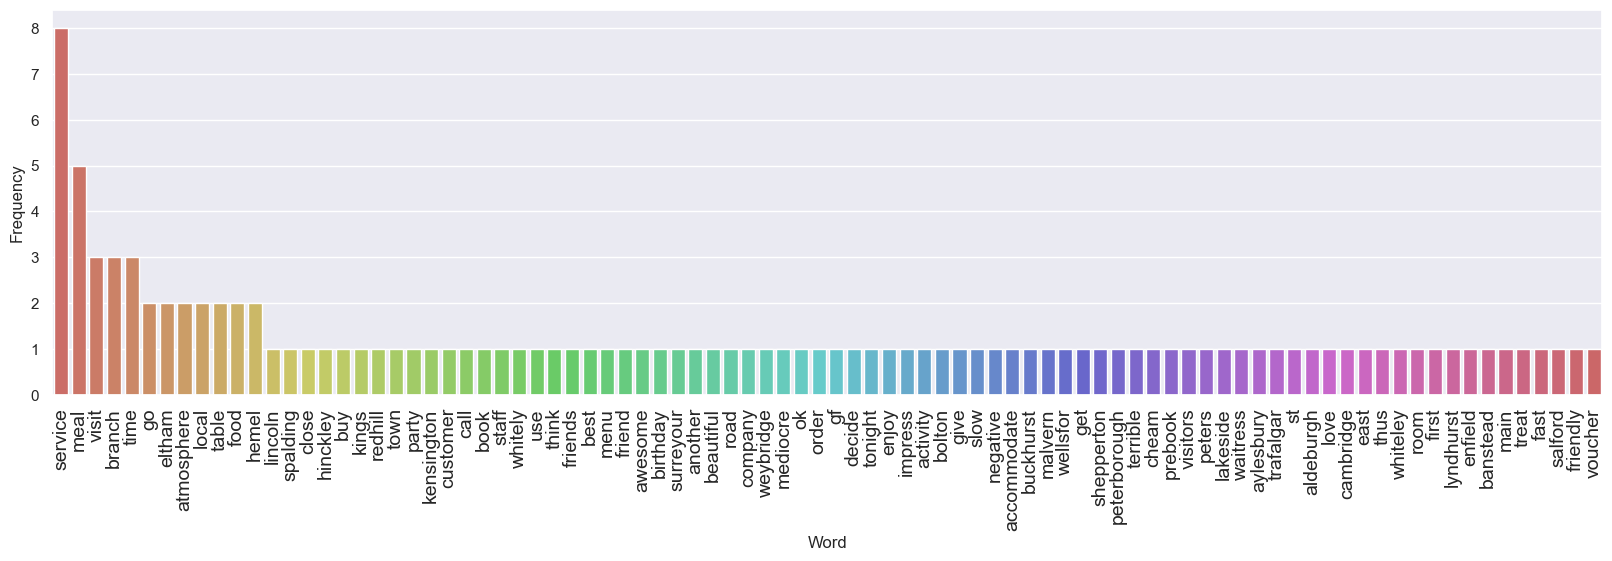

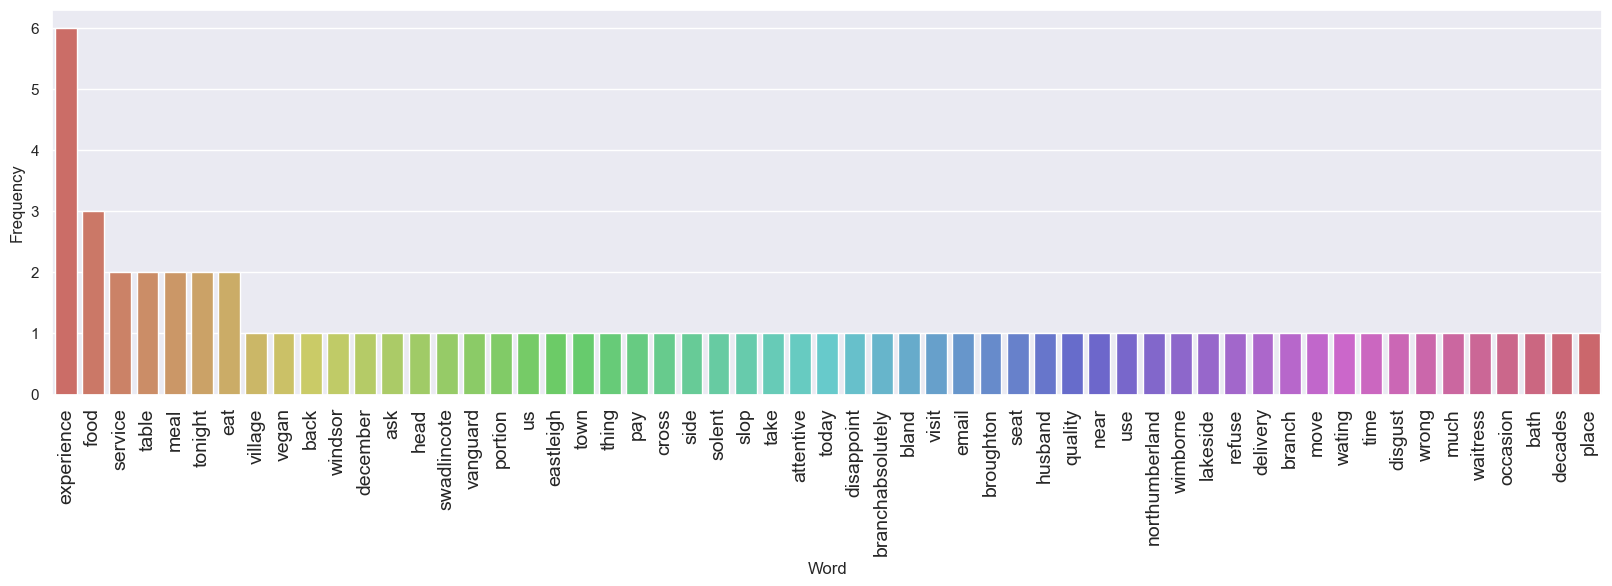

In [ ]:
sns.set()
def word_frequency_barplot(df):
    """ df should have a column named count.
    """
    fig, ax = plt.subplots(1,1,figsize=(20,5))

    sns.barplot(x="Word",y="Frequency",data=df, palette='hls',ax=ax)

    ax.set_xticks(list(range(len(df))))
    ax.set_xticklabels(df.Word[:], fontsize=14, rotation=90)
    return ax

word_frequency_barplot(pos_freq_df)
word_frequency_barplot(neg_freq_df)